# Ripples Data Analysis

## Standard Imports

In [12]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

import scipy 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Ignoring Warnings
import warnings 
warnings.filterwarnings("ignore")

## Loading Data

In [3]:
data = pd.read_csv('../data/ripples.csv')

In [4]:
data.head()

,Unnamed: 0,x,y
0,0,-10.00000,1001.004108
1,1,-9.97998,1001.002103
2,2,-9.95996,1001.000098
3,3,-9.93994,1000.998101
4,4,-9.91992,1000.996120


In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
data.head()

,x,y
0,-10.00000,1001.004108
1,-9.97998,1001.002103
2,-9.95996,1001.000098
3,-9.93994,1000.998101
4,-9.91992,1000.996120


In [7]:
data.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
x,1000.0,1.065814e-16,5.782171,-10.000000,-5.000000,0.000000,5.000000,10.000000
y,1000.0,1.001053e+03,0.217016,1000.786876,1000.967528,1001.004164,1001.050195,1002.003943


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
x    1000 non-null float64
y    1000 non-null float64
dtypes: float64(2)
memory usage: 15.7 KB


## Exploratory Data Analysis

In [9]:
x = data['x']
y = data['y']

In [10]:
scipy.stats.pearsonr(x, y)

(-1.1384122811097797e-17, 1.0000000000000662)

The very low pearson coefficient suggests there is very little correlation between the predictor and the target variable. So we know there is no linear relationship between the two variables. Let us look at a scatterplot to see if there is any relationship between them

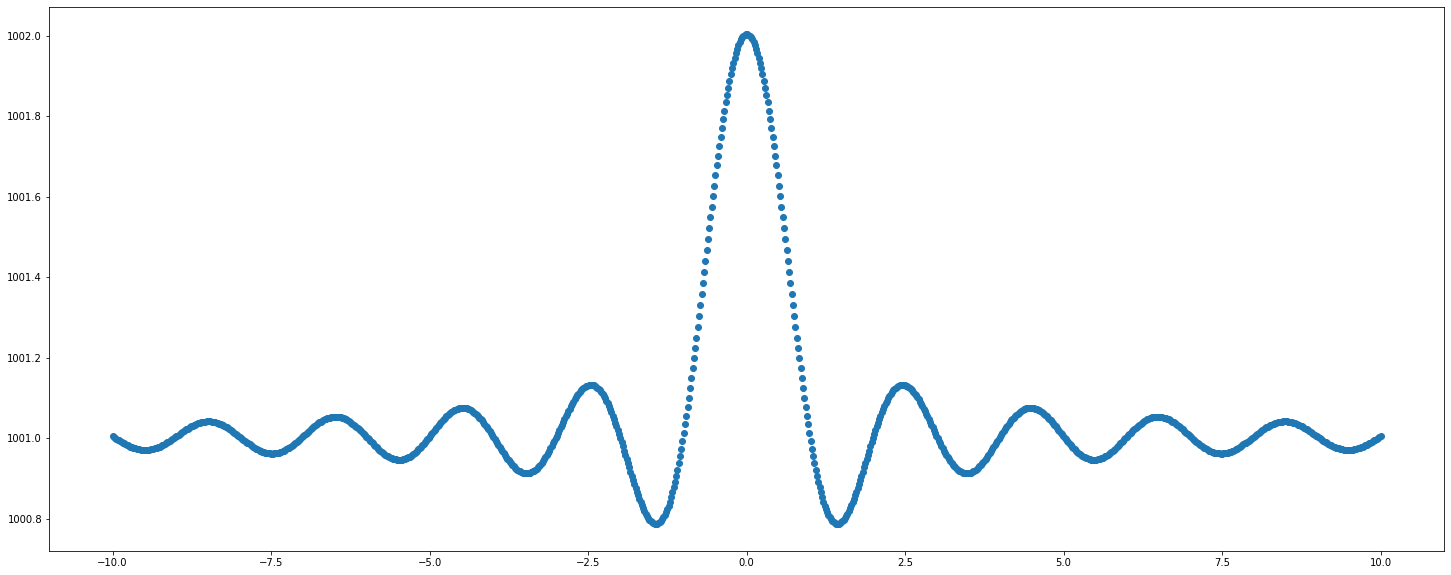

In [13]:
plt.scatter(x, y);

## Regression Models

In [15]:
X = data[['x']]
y = data['y']

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

predictions = lr.predict(X_test)

-0.0009416623926687961


In [20]:
scipy.stats.pearsonr(y_test, predictions)

(-0.008394231856224996, 0.8949355435917824)

As expected linear regression gives a very poor performance considering our dataset isn't linear. So it clearly is not a good predictor for the values of this data

### K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
knn = KNeighborsRegressor()

In [24]:
knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

predictions = knn.predict(X_test)

0.9992942631151543


In [25]:
scipy.stats.pearsonr(y_test, predictions)

(0.9996722062201471, 0.0)

We see that KNN has almost perfect accuracy, which is great news considering this is one of the simpler regressors for non-linear data

### Standardizing the data

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standard_scaled = pd.DataFrame(scaler.fit_transform(X), columns = data.columns.values.tolist()[0:1])

X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y, random_state=42)

### Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf = RandomForestRegressor()

In [29]:
rf.fit(X_train, y_train)

print(rf.score(X_test, y_test))

predictions = rf.predict(X_test)

0.9986741225535425


In [30]:
scipy.stats.pearsonr(y_test, predictions)

(0.9993373028561403, 0.0)

We see that both k-nearest neighbors and random forest regressor has an almost perfect accuracy. Since k-nearest neighbors is a simpler algorithm and requires less computational power and memory, we prefer it to the Random Forest

### Polynomial Regression

In [35]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [36]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.score(X_test_poly, y_test))

predictions = lr.predict(X_test_poly)

0.056025881337738226


In [37]:
scipy.stats.pearsonr(predictions, y_test)

(0.24445925252832648, 9.411423978093907e-05)